In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm

In [3]:
class MCRandomWalk:
    def __init__(self, dim) -> None:
        self.dim = dim
        
    def transition(self, state):
        random_dim = random.randint(0, self.dim)
        sign = 2 * random.randint(0,2) - 1
        state[random_dim] += sign
        return state    
    
    def run(self, n_mc, recur_time):
        initial_state = np.zeros(self.dim)
        num_recur = 0
        for step in range(n_mc):
            state = deepcopy(initial_state)
            for _ in range(recur_time):
                state = self.transition(state)
                if np.all(state == initial_state):
                    num_recur += 1
                    break
        prob = num_recur / n_mc
        return prob
    
    def repeat(self, n_repeat, n_mc, recur_time):
        probs = []
        for i in range(n_repeat):
           prob = self.run(n_mc, recur_time)
           probs.append(prob)
        mean = np.mean(probs)
        std = np.std(probs)
        return mean, std

In [7]:
def run_all(dims, recur_times, n_repeat, n_mc, log=False):
    fig, ax = plt.subplots()
    ax.set_xlabel("recursion time")
    ax.set_ylabel("ecdf")
    ax.set_ylim(0, 1.1)
    
    for dim in tqdm(dims):
        means = []
        stds = []
        randomwalk = MCRandomWalk(dim)
        for recur_time in recur_times:
            mean, std = randomwalk.repeat(n_repeat, n_mc, recur_time)
            means.append(mean)
            stds.append(std)
        ax.errorbar(recur_times, means, yerr=stds, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", label=f"{dim}d")
    
    ax.legend(loc=0)
    if log:
        ax.set_xscale('log')
    plt.savefig('../misc/randomwalk.png')
    plt.show()

In [4]:
dims_test = [1, 2, 3]
recur_times_test = np.linspace(10, 1000, 10, dtype=int).tolist()
n_repeat_test = 5
n_mc_test = 100

In [9]:
run_all(dims_test, recur_times_test, n_repeat_test, n_mc_test)

NameError: name 'dims_test' is not defined

In [11]:
dims = [1, 2, 3, 10, 100]
recur_times = np.linspace(10, 100, 10, dtype=int).tolist()
n_repeat = 5
n_mc = 1000

100%|██████████| 5/5 [02:31<00:00, 30.26s/it]


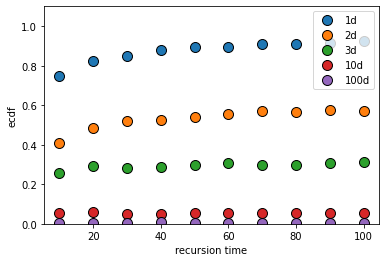

In [12]:
means, stds = run_all(dims, recur_times, n_repeat, n_mc)

In [14]:
dims = [2]
recur_times = np.linspace(10, 100, 10, dtype=int).tolist()
n_repeat = 5
n_mc = 1000

100%|██████████| 1/1 [00:24<00:00, 24.07s/it]


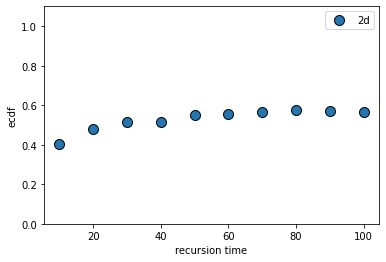

In [15]:
means, stds = run_all(dims, recur_times, n_repeat, n_mc)

In [16]:
means

[0.404,
 0.47759999999999997,
 0.5126000000000001,
 0.513,
 0.5488,
 0.5566000000000001,
 0.5650000000000001,
 0.5758,
 0.5692,
 0.5666]

In [17]:
stds

[0.009736529155710454,
 0.01403709371629326,
 0.010965400129498249,
 0.01479188966968049,
 0.015587174214718955,
 0.012799999999999985,
 0.010411532067856258,
 0.024309668858295847,
 0.01399142594591413,
 0.008404760555780249]

In [13]:
means

[0.005200000000000001,
 0.0044,
 0.0056,
 0.0066,
 0.006,
 0.0046,
 0.005200000000000001,
 0.0056,
 0.0048000000000000004,
 0.005]

分散が小さいため複数回実行しない

100%|██████████| 3/3 [3:55:47<00:00, 4715.70s/it]


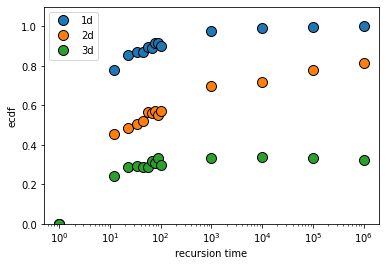

In [193]:
dims = [1, 2, 3]
recur_times = np.linspace(1, 100, 10, dtype=int).tolist()
additional_recur_times = [1000, 10000, 100000, 1000000]
recur_times = recur_times + additional_recur_times
n_repeat = 1
n_mc = 1000
run_all(dims, recur_times, n_repeat, n_mc, log=True)

100%|██████████| 2/2 [22:18:16<00:00, 40148.41s/it]


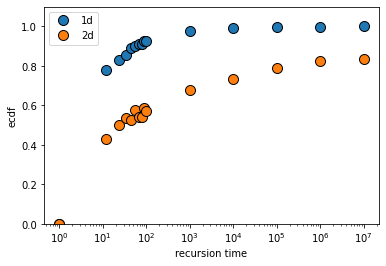

In [5]:
dims = [1, 2]
recur_times = np.linspace(1, 100, 10, dtype=int).tolist()
additional_recur_times = [1000, 10000, 100000, 1000000, 10000000]
recur_times = recur_times + additional_recur_times
n_repeat = 1
n_mc = 1000
run_all(dims, recur_times, n_repeat, n_mc, log=True)